In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# Read in the data
data = []
fin = open("Data/Galaxy Data/SPARC_Lelli2016c.mrt")
lines = fin.read().split("\n")[98:-1]
for line in lines:
    data.append(line.strip().replace(",", ";").split())
print(data)

[['CamB', '10', '3.36', '0.26', '2', '65.0', '5.0', '0.075', '0.003', '1.21', '7.89', '0.47', '66.20', '0.012', '1.21', '0.0', '0.0', '2', 'Bm03'], ['D512-2', '10', '15.20', '4.56', '1', '56.0', '10.0', '0.325', '0.022', '2.37', '9.22', '1.24', '93.94', '0.081', '0.00', '0.0', '0.0', '2', 'Tr09'], ['D564-8', '10', '8.79', '0.28', '2', '63.0', '7.0', '0.033', '0.004', '0.72', '10.11', '0.61', '21.13', '0.029', '0.00', '0.0', '0.0', '2', 'Tr09'], ['D631-7', '10', '7.72', '0.18', '2', '59.0', '3.0', '0.196', '0.009', '1.22', '20.93', '0.70', '115.04', '0.290', '0.00', '57.7', '2.7', '1', 'Tr09;dB01'], ['DDO064', '10', '6.80', '2.04', '1', '60.0', '5.0', '0.157', '0.007', '1.20', '17.41', '0.69', '151.65', '0.211', '3.49', '46.1', '3.9', '1', 'dB02;Sw02'], ['DDO154', '10', '4.04', '0.20', '2', '64.0', '3.0', '0.053', '0.002', '0.65', '19.99', '0.37', '71.26', '0.275', '4.96', '47.0', '1.0', '2', 'Be91;CB89'], ['DDO161', '10', '7.50', '2.25', '1', '70.0', '10.0', '0.548', '0.015', '2.04', '

In [4]:
fout = open("Data/Galaxy Data/SPARC_Lelli2016c.csv", "w")
headers = ",".join(open("Data/Galaxy Data/SPARC_Lelli2016c-headers.txt").read().split("\n"))
fout.write(headers + "\n")
for line in data:
    fout.write(",".join(line))
    if line != data[-1]:
        fout.write("\n")
fout.close()

In [5]:
df = pd.read_csv("Data/Galaxy Data/SPARC_Lelli2016c.csv")
df

,Galaxy,T,D,e_D,f_D,Inc,e_Inc,L[3.6],e_L[3.6],Reff,SBeff,Rdisk,SBdisk,MHI,RHI,Vflat,e_Vflat,Q,Ref.
0,CamB,10,3.36,0.26,2,65.0,5.0,0.075,0.003,1.21,7.89,0.47,66.20,0.012,1.21,0.0,0.0,2,Bm03
1,D512-2,10,15.20,4.56,1,56.0,10.0,0.325,0.022,2.37,9.22,1.24,93.94,0.081,0.00,0.0,0.0,2,Tr09
2,D564-8,10,8.79,0.28,2,63.0,7.0,0.033,0.004,0.72,10.11,0.61,21.13,0.029,0.00,0.0,0.0,2,Tr09
3,D631-7,10,7.72,0.18,2,59.0,3.0,0.196,0.009,1.22,20.93,0.70,115.04,0.290,0.00,57.7,2.7,1,Tr09;dB01
4,DDO064,10,6.80,2.04,1,60.0,5.0,0.157,0.007,1.20,17.41,0.69,151.65,0.211,3.49,46.1,3.9,1,dB02;Sw02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,UGC12632,9,9.77,2.93,1,46.0,3.0,1.301,0.030,3.94,13.09,2.42,66.81,1.744,12.60,71.7,2.8,1,Sw09;Sw02
171,UGC12732,9,13.20,4.00,1,39.0,6.0,1.667,0.048,3.12,26.84,1.98,120.46,3.660,17.41,0.0,0.0,1,Sw09;Sw02
172,UGCA281,11,5.68,0.28,2,67.0,3.0,0.194,0.007,1.57,12.50,1.72,12.05,0.062,1.83,0.0,0.0,3,Le14
173,UGCA442,9,4.35,0.22,2,64.0,7.0,0.140,0.005,1.71,7.60,1.18,116.10,0.263,4.37,56.4,2.1,1,Co00


In [15]:
df['LumCalc'] = df['Reff'] ** 2 * np.cos(df['Inc'] * np.pi / 180) * 4 * np.pi * df['SBeff'] / (10 ** 3)

In [16]:
df['LumPercentError'] = np.abs(df['L[3.6]'] - df['LumCalc']) / df['L[3.6]']

In [17]:
q1_avg = np.mean(df[df['Q'] == 1]['LumPercentError'])
q2_avg = np.mean(df[df['Q'] == 2]['LumPercentError'])
q3_avg = np.mean(df[df['Q'] == 3]['LumPercentError'])
print(q1_avg, q2_avg, q3_avg)

0.7278554528325102 0.806976303315144 0.5089428554320584


In [18]:
df

,Galaxy,T,D,e_D,f_D,Inc,e_Inc,L[3.6],e_L[3.6],Reff,...,Rdisk,SBdisk,MHI,RHI,Vflat,e_Vflat,Q,Ref.,LumCalc,LumPercentError
0,CamB,10,3.36,0.26,2,65.0,5.0,0.075,0.003,1.21,...,0.47,66.20,0.012,1.21,0.0,0.0,2,Bm03,0.009256,0.876585
1,D512-2,10,15.20,4.56,1,56.0,10.0,0.325,0.022,2.37,...,1.24,93.94,0.081,0.00,0.0,0.0,2,Tr09,0.099620,0.693477
2,D564-8,10,8.79,0.28,2,63.0,7.0,0.033,0.004,0.72,...,0.61,21.13,0.029,0.00,0.0,0.0,2,Tr09,0.021462,0.349640
3,D631-7,10,7.72,0.18,2,59.0,3.0,0.196,0.009,1.22,...,0.70,115.04,0.290,0.00,57.7,2.7,1,Tr09;dB01,0.066377,0.661344
4,DDO064,10,6.80,2.04,1,60.0,5.0,0.157,0.007,1.20,...,0.69,151.65,0.211,3.49,46.1,3.9,1,dB02;Sw02,0.052081,0.668276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,UGC12632,9,9.77,2.93,1,46.0,3.0,1.301,0.030,3.94,...,2.42,66.81,1.744,12.60,71.7,2.8,1,Sw09;Sw02,0.669193,0.485632
171,UGC12732,9,13.20,4.00,1,39.0,6.0,1.667,0.048,3.12,...,1.98,120.46,3.660,17.41,0.0,0.0,1,Sw09;Sw02,1.027603,0.383562
172,UGCA281,11,5.68,0.28,2,67.0,3.0,0.194,0.007,1.57,...,1.72,12.05,0.062,1.83,0.0,0.0,3,Le14,0.181574,0.064049
173,UGCA442,9,4.35,0.22,2,64.0,7.0,0.140,0.005,1.71,...,1.18,116.10,0.263,4.37,56.4,2.1,1,Co00,0.058295,0.583609


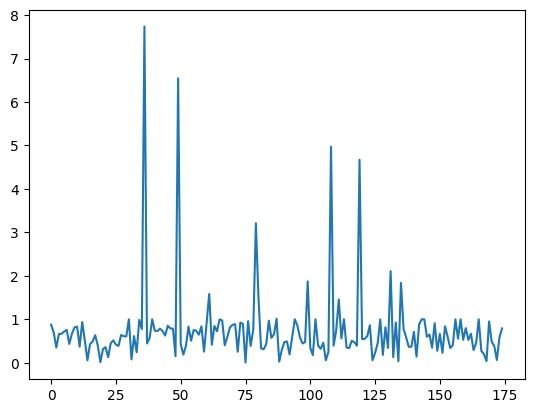

In [19]:
# plot the error distribution as a line graph
plt.plot(df['LumPercentError'])